In [1]:
from BasinGeo import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
# complete = pd.read_csv('/data/SO2/fkalkin/Processed/EOF.csv')
complete = pd.read_csv('EOF.csv')
data = complete.assign(dy=complete.get('nlat')-complete.get('lat'));
data = data.assign(dx=data.get('nlon')-data.get('lon'));
for i in range(1, 9):
  data[f'prev_ts{i}'] = data[f'ts{i}'].shift(1)
data['prev_dy'] = data['dy'].shift(1)
data['prev_dx'] = data['dx'].shift(1)

mask = (data['folderidx'] == data['folderidx'].shift(1)) & \
       (data['float'] == data['float'].shift(1)) & \
       (data['profileidx'] == data['profileidx'].shift(1) + 1)
data.loc[~mask, [f'prev_ts{i}' for i in range(1, 9)]] = np.nan
data = data.dropna()

for i in range(1, 9):
  data[f'prev2_ts{i}'] = data[f'ts{i}'].shift(2)
data['prev2_dy'] = data['dy'].shift(2)
data['prev2_dx'] = data['dx'].shift(2)

mask = (data['folderidx'] == data['folderidx'].shift(2)) & \
       (data['float'] == data['float'].shift(2)) & \
       (data['profileidx'] == data['profileidx'].shift(2) + 2)
data.loc[~mask, [f'prev2_ts{i}' for i in range(1, 9)]] = np.nan
data = data.dropna()

for i in range(1, 9):
  data[f'prev3_ts{i}'] = data[f'ts{i}'].shift(3)
data['prev3_dy'] = data['dy'].shift(3)
data['prev3_dx'] = data['dx'].shift(3)

mask = (data['folderidx'] == data['folderidx'].shift(3)) & \
       (data['float'] == data['float'].shift(3)) & \
       (data['profileidx'] == data['profileidx'].shift(3) + 3)
data.loc[~mask, [f'prev3_ts{i}' for i in range(1, 9)]] = np.nan
data = data.dropna()

data

,folderidx,float,profileidx,year,month,day,lat,lon,nlat,nlon,...,prev3_ts1,prev3_ts2,prev3_ts3,prev3_ts4,prev3_ts5,prev3_ts6,prev3_ts7,prev3_ts8,prev3_dy,prev3_dx
6,0.0,1901932.0,6.0,2021.0,7.0,18.0,-40.4052,43.1839,-38.8929,46.7036,...,-7.028408,-3.373396,-2.194893,-1.104086,-0.824606,-0.262984,0.291729,-0.280132,0.7333,2.7276
7,0.0,1901932.0,7.0,2021.0,7.0,28.0,-38.8929,46.7036,-39.8170,47.5256,...,-3.312371,-3.200434,-1.266698,-0.764814,-0.671834,-0.252487,0.113580,0.043449,1.2742,2.2103
24,0.0,1901932.0,30.0,2022.0,3.0,13.0,-40.8223,69.1665,-40.1681,68.6185,...,-8.392159,-3.300792,-2.213014,-3.218870,-0.469602,-0.718802,-0.159675,-0.321880,0.6188,-0.3215
49,0.0,1901932.0,67.0,2023.0,3.0,14.0,-38.3526,58.8399,-37.7722,59.9393,...,-10.086343,-2.950153,-1.922436,-3.714099,-0.282440,0.002298,-0.144653,-0.147616,0.0822,-1.0592
59,0.0,1901848.0,9.0,2014.0,8.0,31.0,-33.7220,41.4660,-32.8910,41.8830,...,-21.125897,-0.737670,1.333214,-6.201312,1.688541,1.342113,-0.073503,-0.666532,0.7610,-1.2280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204320,10.0,4902368.0,212.0,2022.0,4.0,28.0,46.7420,-133.6720,46.7260,-133.7430,...,11.228871,-4.244947,2.444790,-0.433921,0.104136,-0.361842,0.051863,-0.080995,-0.0520,0.0630
1204332,10.0,4902368.0,227.0,2022.0,9.0,25.0,46.4650,-135.5640,46.5510,-135.7530,...,10.782202,-3.984060,2.379806,-0.516169,0.102786,-0.369675,-0.050710,0.078214,0.0760,-0.1330
1204333,10.0,4902368.0,228.0,2022.0,10.0,5.0,46.5510,-135.7530,46.6460,-135.8160,...,10.739636,-4.057634,2.394059,-0.541450,0.120537,-0.318242,-0.084188,-0.003025,0.0660,-0.1470
1204334,10.0,4902368.0,229.0,2022.0,10.0,15.0,46.6460,-135.8160,46.7310,-135.9110,...,10.894015,-4.220115,2.668871,-0.511199,0.197660,-0.431131,-0.154622,-0.050250,0.0710,-0.1400


0.5255064676699238 0.30587620155480144


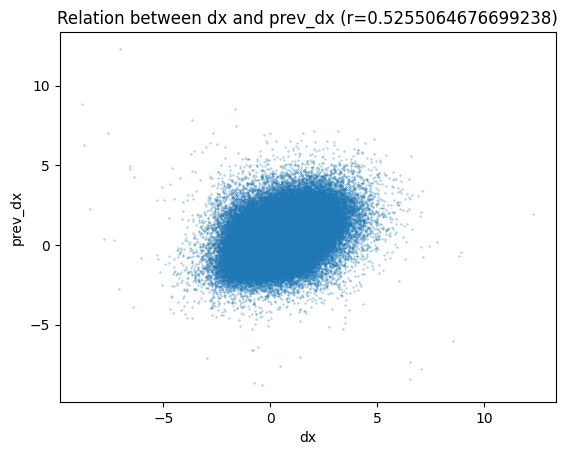

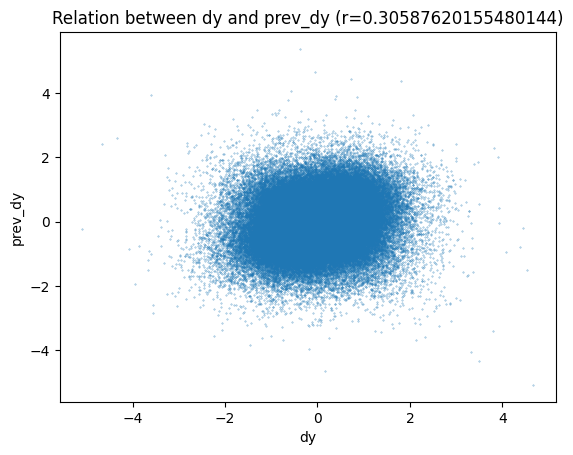

In [3]:
# find correlation between prev_dx and dx
prev_dx = data.get('prev_dx')
dx = data.get('dx')
prev_dy = data.get('prev_dy')
dy = data.get('dy')
print(dx.corr(prev_dx), dy.corr(prev_dy))

plt.scatter(dx, prev_dx, alpha=.7, s=0.1);
plt.title(f'Relation between dx and prev_dx (r={dx.corr(prev_dx)})')
plt.xlabel('dx')
plt.ylabel('prev_dx');
plt.show()

plt.scatter(dy, prev_dy, alpha=.7, s=0.1);
plt.title(f'Relation between dy and prev_dy (r={dy.corr(prev_dy)})')
plt.xlabel('dy')
plt.ylabel('prev_dy');
plt.show()

In [4]:
for basin in basins.keys():
    print(basin)

Indian
NAtlantic
TropicalAtlantic
SouthAtlantic
NPacific
TropicalPacific
SP1
SP2
GOM


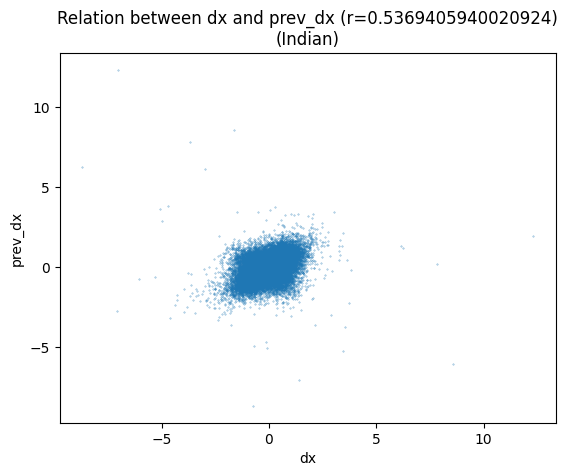

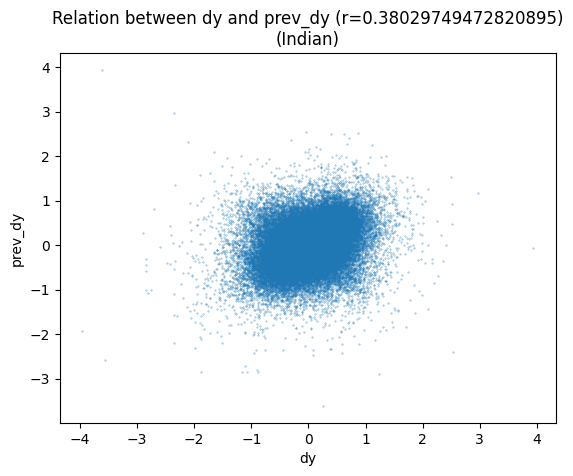

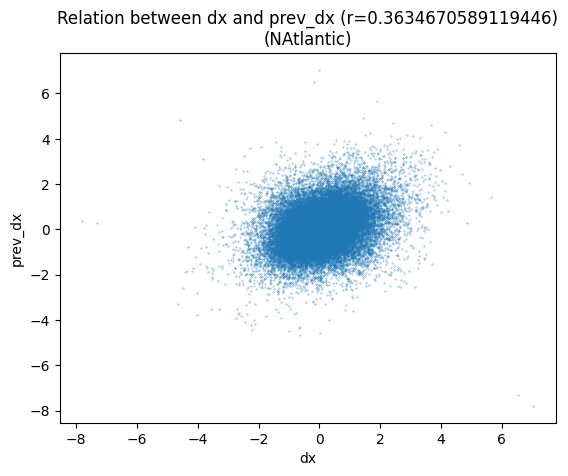

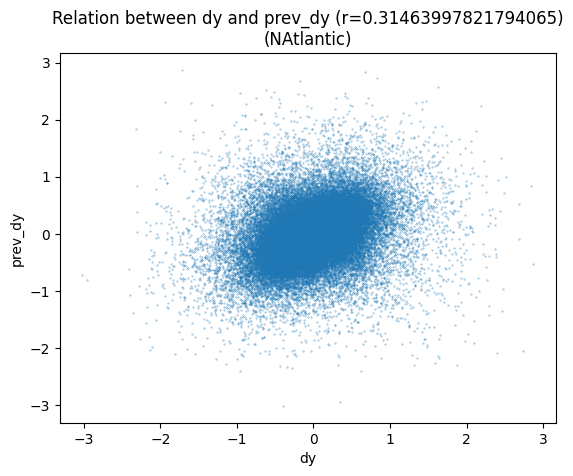

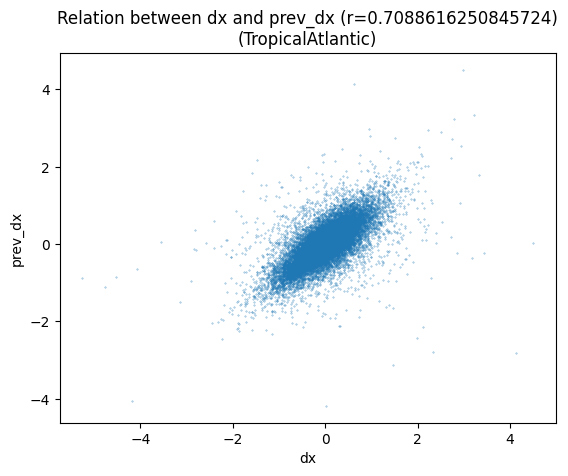

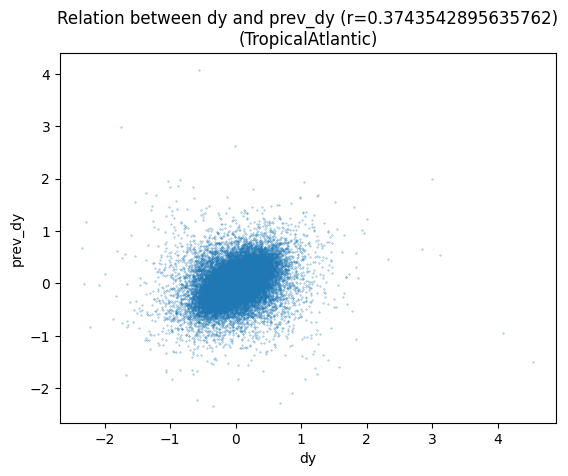

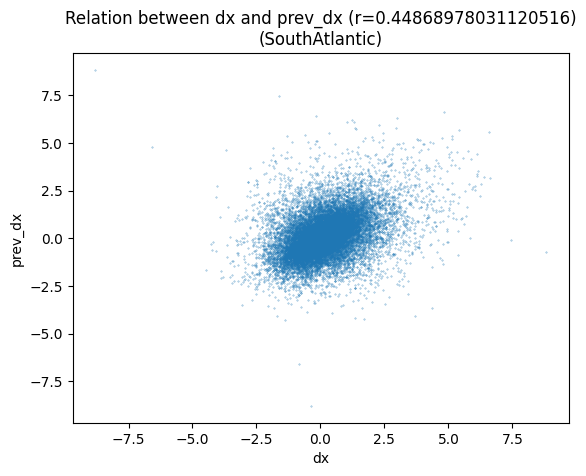

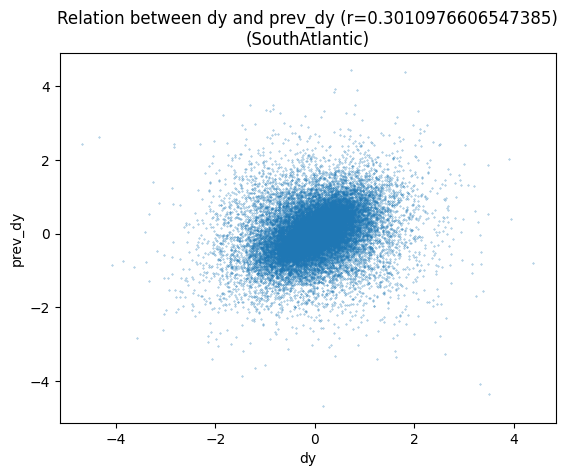

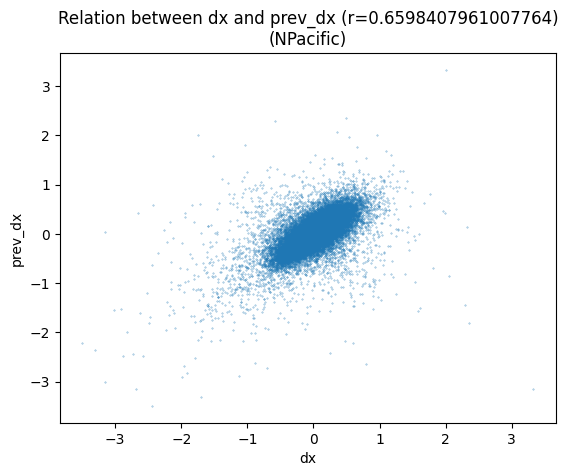

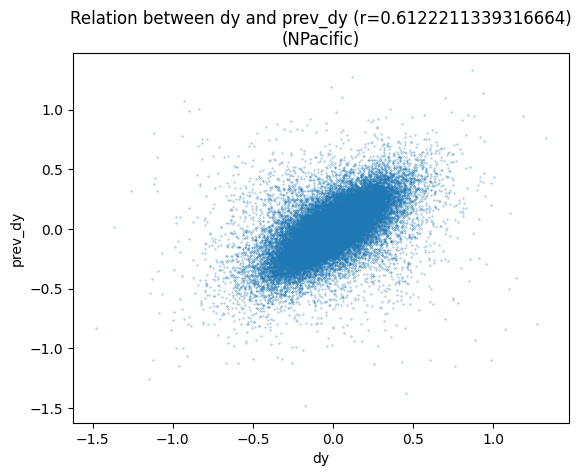

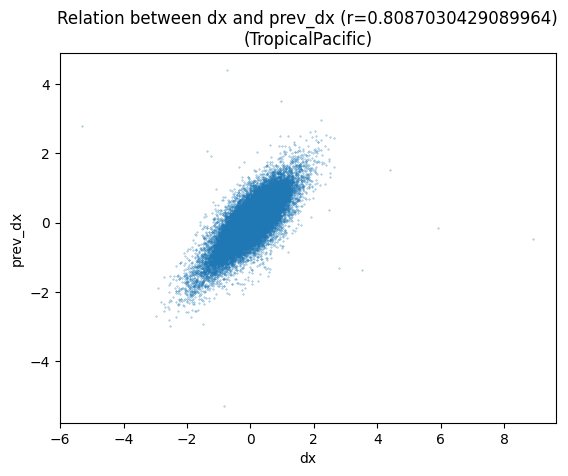

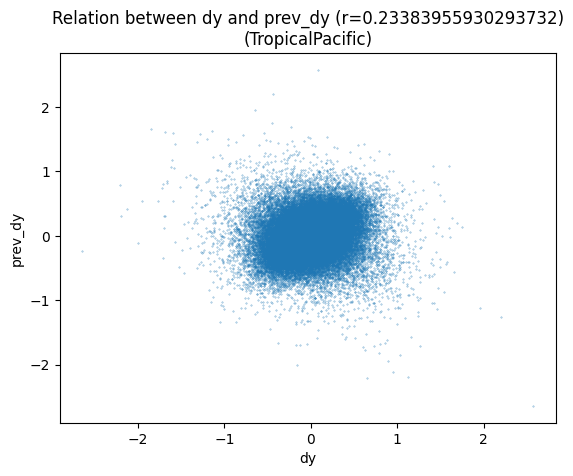

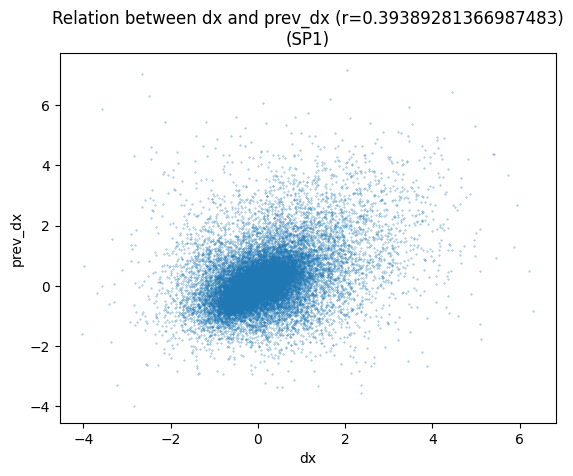

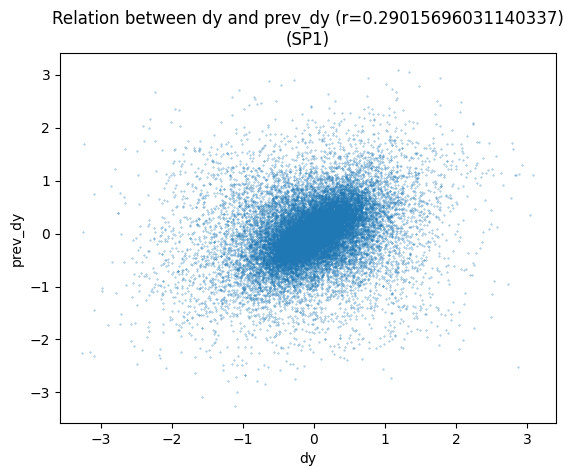

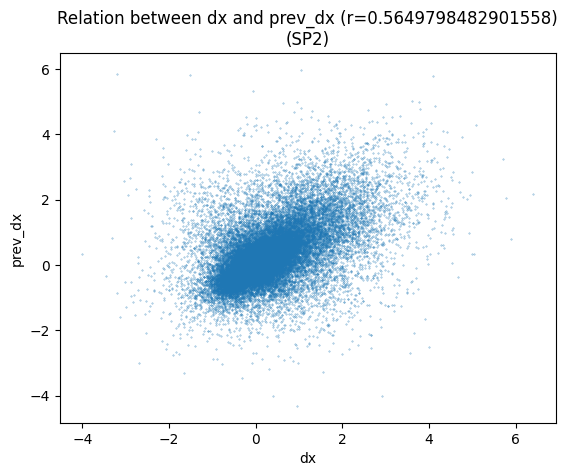

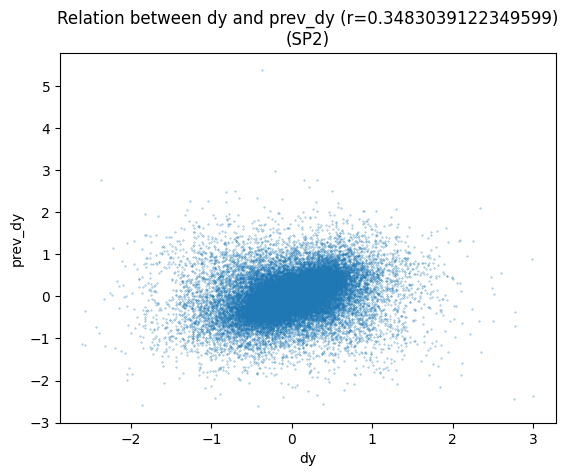

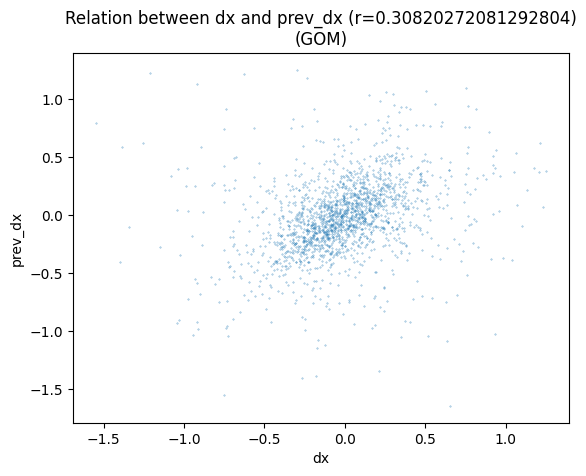

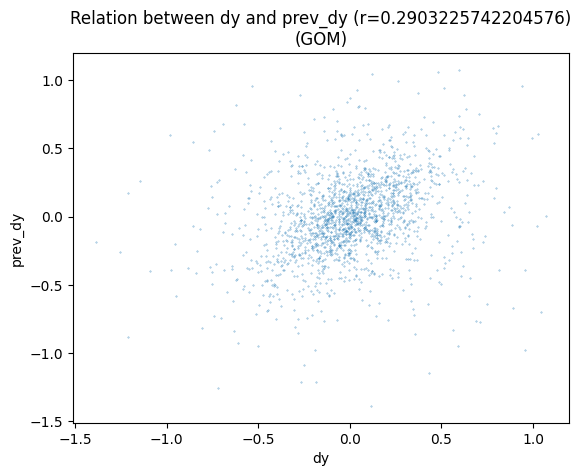

In [5]:
for basin in basins:
    chosen = shapely.Polygon(basins[basin])
    vPoint = np.vectorize(Point)
    points_list = vPoint(data['lon'], data['lat'])
    data['in_chosen_basin'] = chosen.contains(points_list)
    subset = data[data.get('in_chosen_basin') == True]

    # find correlation between prev_dx and dx
    prev_dx = subset.get('prev_dx')
    dx = subset.get('dx')
    prev_dy = subset.get('prev_dy')
    dy = subset.get('dy')

    plt.scatter(dx, prev_dx, alpha=.7, s=0.1);
    plt.title(f'Relation between dx and prev_dx (r={dx.corr(prev_dx)})\n({basin})')
    plt.xlabel('dx')
    plt.ylabel('prev_dx');
    plt.show()

    plt.scatter(dy, prev_dy, alpha=.7, s=0.1);
    plt.title(f'Relation between dy and prev_dy (r={dy.corr(prev_dy)})\n({basin})')
    plt.xlabel('dy')
    plt.ylabel('prev_dy');
    plt.show()

In [7]:
chosen1 = shapely.Polygon(basins['SP1'])
chosen2 = shapely.Polygon(basins['SP2'])
vPoint = np.vectorize(Point)
points_list = vPoint(data['lon'], data['lat'])
data['in_chosen_basin'] = np.logical_or(chosen1.contains(points_list), chosen2.contains(points_list))
subset = data[data.get('in_chosen_basin') == True]

subset

,folderidx,float,profileidx,year,month,day,lat,lon,nlat,nlon,...,prev3_ts2,prev3_ts3,prev3_ts4,prev3_ts5,prev3_ts6,prev3_ts7,prev3_ts8,prev3_dy,prev3_dx,in_chosen_basin
19376,0.0,1901058.0,320.0,2016.0,9.0,15.0,-52.3154,148.3823,-51.2250,151.3690,...,-2.843776,0.399144,0.074481,-0.565604,-0.286282,-0.043019,0.033602,-1.5097,1.2983,True
19377,0.0,1901058.0,321.0,2016.0,9.0,25.0,-51.2250,151.3690,-52.0847,153.0474,...,-2.717825,0.589305,0.162663,-0.434535,-0.501078,-0.004275,-0.068857,-0.1730,0.8654,True
19378,0.0,1901058.0,322.0,2016.0,10.0,5.0,-52.0847,153.0474,-51.3730,156.7520,...,-4.021095,1.216196,-1.067348,-0.659913,-0.958552,-0.025775,0.227624,0.6727,0.1774,True
19379,0.0,1901058.0,323.0,2016.0,10.0,15.0,-51.3730,156.7520,-51.0612,158.4480,...,-4.156763,0.351576,-1.087860,-0.692184,-0.794396,-0.022905,0.316060,1.0904,2.9867,True
19380,0.0,1901058.0,324.0,2016.0,10.0,25.0,-51.0612,158.4480,-51.3151,160.9023,...,-3.370892,1.017749,-0.793429,-0.571832,-0.841179,-0.040446,-0.024016,-0.8597,1.6784,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203241,10.0,5900797.0,131.0,2008.0,8.0,16.0,-58.3090,-72.0070,-57.0990,-72.2270,...,-3.213187,1.270622,-1.137797,-1.013886,-0.155173,0.168320,0.213124,0.2600,-1.4800,True
1203242,10.0,5900797.0,132.0,2008.0,8.0,26.0,-57.0990,-72.2270,-56.6960,-72.1780,...,-3.263703,1.310329,-1.263858,-1.094673,-0.020839,0.210533,0.165770,-0.8790,-0.0230,True
1203243,10.0,5900797.0,133.0,2008.0,9.0,5.0,-56.6960,-72.1780,-56.9420,-70.4980,...,-2.461131,1.322549,-0.635491,-0.790107,-0.293824,0.178407,0.184035,0.6190,2.7870,True
1203244,10.0,5900797.0,134.0,2008.0,9.0,15.0,-56.9420,-70.4980,-57.1490,-67.5040,...,-2.822111,1.494110,-0.827576,-0.928646,-0.372925,0.283366,0.206150,1.2100,-0.2200,True


In [8]:
subset.to_csv('SouthPacific2.csv')